In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from collections import Counter
import numpy as np
import seaborn as sns

In [22]:
data = pd.read_csv("train.csv", sep=",")
data.head(5) 

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [23]:
data.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

Now I will delete all columns which I don't need. It will be State, RescuerID, VideoAmt, Description, PhotoAmt.

In [24]:
col_lst = ["State", "Name", "RescuerID", "VideoAmt", "Description", "PhotoAmt", "PetID"]
data.drop(columns=col_lst, inplace=True)

In [25]:
data.head(5)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,2
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,3
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,2
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,2


In [26]:
data.shape

(14993, 17)

Check the data on missing values.

In [27]:
data.isnull().sum()

Type             0
Age              0
Breed1           0
Breed2           0
Gender           0
Color1           0
Color2           0
Color3           0
MaturitySize     0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Quantity         0
Fee              0
AdoptionSpeed    0
dtype: int64

In [28]:
from scipy import stats

In [29]:
z = np.abs(stats.zscore(data))
print(z)

[[1.08869186 0.41046553 0.56161035 ... 0.39123731 1.00418405 0.43869335]
 [1.08869186 0.5206269  0.00453908 ... 0.39123731 0.27113205 2.1376032 ]
 [0.91853355 0.5206269  0.69482199 ... 0.39123731 0.27113205 0.41076157]
 ...
 [1.08869186 0.46554622 0.00453908 ... 2.32536384 0.11146278 0.41076157]
 [1.08869186 0.07998143 0.01211237 ... 0.39123731 0.27113205 1.26021649]
 [0.91853355 0.5206269  0.69482199 ... 0.39123731 0.27113205 0.41076157]]


In [30]:
threshold = 3
result = np.where(z > 3)
print(result)
print(len(result[0]))

(array([    6,     7,    13, ..., 14959, 14965, 14976], dtype=int64), array([15, 14, 14, ...,  2, 13,  1], dtype=int64))
2178


In [31]:
data.shape

(14993, 17)

In [32]:
data = data[(z < 3).all(axis=1)]

In [33]:
data.shape

(13017, 17)

In [34]:
X = data.loc[:, data.columns != 'AdoptionSpeed']
Y = data["AdoptionSpeed"]

In [35]:
X.head(5)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0


In [36]:
Y.head(5)

0    2
1    0
2    3
3    2
4    2
Name: AdoptionSpeed, dtype: int64

I will use Recursive Feature Elimination to know feature ranking.

In [37]:
model = LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(X, Y)
print("Num Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)


Num Features:  8
Selected Features:  [ True False False False  True False False False  True  True  True  True
  True  True False False]
Feature Ranking:  [1 4 7 9 1 3 5 6 1 1 1 1 1 1 2 8]


And now we're knowingthe ranking of all needed features. 

Type         -> 1,  
Age          -> 6,  
Breed1       -> 7,  
Breed2       -> 9,  
Gender       -> 1,  
Color1       -> 3,  
Color2       -> 5,  
Color3       -> 4,  
MaturitySize -> 1,  
FurLength    -> 1,  
Vaccinated   -> 1,  
Dewormed     -> 1,  
Sterilized   -> 1,  
Health       -> 1,  
Quantity     -> 2,  
Fee          -> 8

According to this, we can say that for people how to find a pet is important such criteria like type (cat or dog), gender, health, maturity size, fur length, if this pet is vaccinated, dewormed, sterilized.

In [38]:
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.00968748 0.21143807 0.09024863 0.07330298 0.04768868 0.11122976
 0.11236628 0.05434466 0.04611261 0.04061006 0.02873933 0.032622
 0.03621487 0.         0.04364015 0.06175443]


Type         -> 0.008,  
Age          -> 0.223,  
Breed1       -> 0.094,  
Breed2       -> 0.065,  
Gender       -> 0.043,  
Color1       -> 0.105,  
Color2       -> 0.099,  
Color3       -> 0.049,  
MaturitySize -> 0.047,  
FurLength    -> 0.034,  
Vaccinated   -> 0.03,  
Dewormed     -> 0.031,  
Sterilized   -> 0.029,  
Health       -> 0.014,  
Quantity     -> 0.065,  
Fee          -> 0.063

In [39]:
dogs = data.loc[data['Type'] == 1]

cats = data.loc[data['Type'] == 2]

In [40]:
dogs.drop(columns=["Type"], inplace=True)
cats.drop(columns=["Type"], inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [41]:
dogs.shape

(6668, 16)

In [42]:
cats.shape

(6349, 16)

Like we see from the shape. From overall dataset, dogs have 54.23% and cats have 45.77%. Now we can say that according to this dataset there are more dogs in a shelter than cats.

After that I want to know why some pet have hight adopt speed.

In [43]:
dogs["AdoptionSpeed"].unique()

array([3, 2, 1, 4, 0], dtype=int64)

In [44]:
cats["AdoptionSpeed"].unique()

array([2, 0, 1, 4, 3], dtype=int64)

Like you see feature 'AdoptionSpeed' have 5 values. It's  4,3 -> high adoption speed and 2,1,0 -> low adoption speed. 

In [45]:
dogs_with_high_adoption_speed = dogs.loc[(dogs['AdoptionSpeed'] == 4) | (dogs['AdoptionSpeed'] == 3)]
cats_with_high_adoption_speed = cats.loc[(cats['AdoptionSpeed'] == 4) | (cats['AdoptionSpeed'] == 3)]

dogs_with_low_adoption_speed = dogs.loc[(dogs['AdoptionSpeed'] == 1) | (dogs['AdoptionSpeed'] == 2) | (dogs['AdoptionSpeed'] == 0)]
cats_with_low_adoption_speed = cats.loc[(cats['AdoptionSpeed'] == 1) | (cats['AdoptionSpeed'] == 2) | (cats['AdoptionSpeed'] == 0)]

In [46]:
dogs_with_high_adoption_speed.shape

(3589, 16)

In [47]:
dogs_with_low_adoption_speed.shape

(3079, 16)

In [48]:
cats_with_high_adoption_speed.shape

(2823, 16)

In [49]:
cats_with_low_adoption_speed.shape

(3526, 16)

After dividing data on high and low adoption speed we can see that high adoption speed have 53.65% of dogs, in accordance 46.35% have low adoption speed. Cats have a different situation. 45% have high adoption speed and  55% have low.

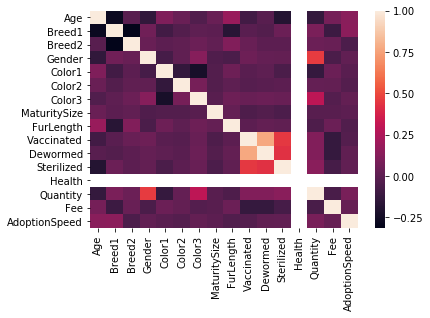

In [50]:
corr = dogs_with_high_adoption_speed.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

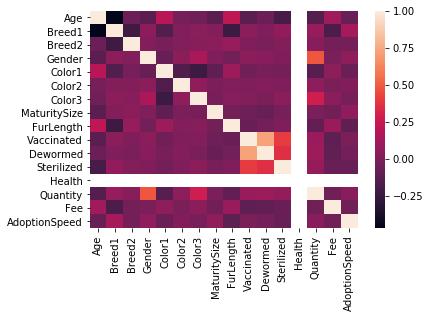

In [51]:
corr = dogs_with_low_adoption_speed.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

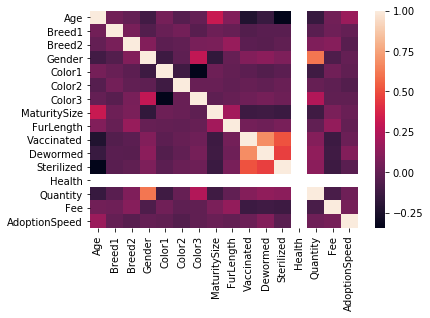

In [52]:
corr = cats_with_high_adoption_speed.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

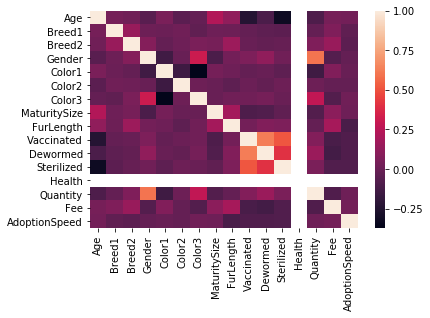

In [53]:
corr = cats_with_low_adoption_speed.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [208]:
Counter(dogs_with_high_adoption_speed['Breed1'])

Counter({307: 3408,
         218: 85,
         189: 34,
         205: 62,
         128: 36,
         213: 50,
         207: 10,
         195: 29,
         70: 2,
         103: 38,
         10: 3,
         78: 34,
         20: 43,
         109: 54,
         26: 10,
         141: 95,
         0: 4,
         129: 2,
         173: 11,
         200: 8,
         119: 17,
         152: 31,
         44: 5,
         64: 1,
         60: 15,
         69: 14,
         233: 1,
         239: 9,
         231: 4,
         179: 54,
         232: 2,
         76: 19,
         58: 1,
         192: 1,
         154: 1,
         71: 2,
         49: 9,
         39: 14,
         93: 1,
         1: 2,
         17: 5,
         224: 1,
         42: 2,
         50: 6,
         117: 6,
         201: 1,
         182: 7,
         75: 9,
         19: 5,
         15: 5,
         16: 1,
         187: 2,
         165: 1,
         227: 3,
         72: 5,
         31: 3,
         206: 6,
         176: 1,
         214: 1,
 

In [209]:
Counter(dogs_with_low_adoption_speed['Breed1'])

Counter({307: 2515,
         205: 127,
         141: 110,
         173: 12,
         207: 14,
         189: 54,
         119: 20,
         109: 97,
         206: 19,
         78: 28,
         20: 47,
         69: 27,
         179: 113,
         218: 76,
         31: 5,
         128: 28,
         70: 9,
         200: 7,
         213: 39,
         195: 40,
         25: 1,
         202: 3,
         103: 60,
         72: 10,
         24: 2,
         75: 19,
         185: 2,
         76: 20,
         139: 1,
         102: 3,
         182: 14,
         145: 2,
         178: 16,
         82: 3,
         49: 7,
         169: 15,
         111: 4,
         155: 3,
         147: 13,
         215: 1,
         108: 2,
         152: 36,
         240: 5,
         83: 7,
         50: 6,
         100: 3,
         15: 3,
         190: 5,
         19: 4,
         39: 12,
         26: 16,
         224: 2,
         60: 22,
         105: 2,
         234: 1,
         129: 2,
         32: 3,
         187: 2,


In [210]:
Counter(cats_with_high_adoption_speed['Breed1'])

Counter({265: 539,
         266: 1729,
         114: 1,
         243: 51,
         250: 9,
         299: 155,
         285: 72,
         303: 15,
         264: 107,
         305: 6,
         306: 28,
         247: 24,
         292: 91,
         286: 1,
         277: 4,
         300: 9,
         254: 59,
         242: 9,
         294: 4,
         283: 42,
         296: 4,
         270: 1,
         295: 9,
         304: 3,
         25: 2,
         21: 1,
         272: 4,
         262: 2,
         241: 15,
         289: 6,
         276: 12,
         249: 11,
         267: 1,
         248: 1,
         251: 11,
         284: 5,
         256: 1,
         282: 5,
         293: 1,
         257: 1,
         252: 10,
         263: 2,
         273: 3,
         253: 4,
         244: 2,
         246: 2,
         279: 3,
         245: 1,
         297: 1,
         15: 1,
         260: 1,
         280: 1,
         288: 2,
         268: 3,
         307: 4,
         274: 1,
         301: 1})

In [211]:
Counter(cats_with_low_adoption_speed['Breed1'])

Counter({299: 187,
         265: 719,
         266: 1905,
         264: 189,
         285: 149,
         292: 173,
         254: 46,
         283: 31,
         288: 14,
         247: 47,
         248: 1,
         284: 2,
         243: 43,
         296: 1,
         300: 12,
         276: 22,
         289: 20,
         306: 28,
         305: 2,
         267: 2,
         268: 3,
         251: 23,
         245: 1,
         282: 12,
         242: 8,
         241: 13,
         249: 8,
         273: 4,
         293: 2,
         295: 4,
         303: 27,
         252: 13,
         280: 4,
         272: 2,
         274: 4,
         304: 4,
         263: 1,
         290: 1,
         0: 1,
         244: 3,
         253: 1,
         281: 2,
         250: 5,
         218: 1,
         277: 4,
         301: 4,
         260: 1,
         270: 1,
         269: 2,
         70: 1,
         297: 4,
         256: 1,
         262: 1,
         205: 1,
         246: 2,
         298: 1,
         271: 3,
       

Dogs with high adoption speed:                                                                                                    
307 - 78%                                                                                                                        
218, 205, 213, 109, 141, 179 - 9%                                                                                                 
another - 13%                                                                                                                   

Dogs with low adoption speed:                                                                                                                       
307 - 66%                                                                                                                                     
205, 141, 189, 109, 179, 218, 103 - 16%

another - 18 %

Cats with high adoption speed:

265 - 17%

266 - 55%

243, 299, 285, 264, 292, 254 - 17%

another - 11%

Cats with low adoption speed:

266 - 50%

265 - 19%

187, 189, 149, 173 - 18%

another - 13%

*In poster I will show not the breed ID like here, but their names. 

In [212]:
Counter(dogs_with_high_adoption_speed['Gender'])

Counter({1: 1447, 2: 2408, 3: 508})

In [213]:
Counter(dogs_with_low_adoption_speed['Gender'])

Counter({2: 1844, 1: 1558, 3: 367})

In [214]:
Counter(cats_with_high_adoption_speed['Gender'])

Counter({2: 1388, 3: 637, 1: 1068})

In [215]:
Counter(cats_with_low_adoption_speed['Gender'])

Counter({1: 1463, 2: 1637, 3: 668})

Dogs with high adoption speed:

male: 33%

female: 55%

unknown: 12%

Dogs with low adoption speed:

male: 41%

female: 48%

unknown: 11%

Cats with high adoption speed:

male: 34%

female: 44%

unknown: 22%

Cats with low adoption speed:

male: 38%

female: 43%

unknown: 19%

In [216]:
Counter(dogs_with_high_adoption_speed['Color1'])

Counter({2: 1504, 1: 2078, 6: 43, 5: 282, 7: 181, 3: 175, 4: 100})

In [217]:
Counter(dogs_with_low_adoption_speed['Color1'])

Counter({1: 1866, 2: 1155, 5: 298, 7: 182, 3: 167, 4: 49, 6: 52})

In [218]:
Counter(cats_with_high_adoption_speed['Color1'])

Counter({1: 1642, 2: 482, 3: 247, 7: 115, 4: 236, 5: 110, 6: 261})

In [219]:
Counter(cats_with_low_adoption_speed['Color1'])

Counter({1: 1841, 5: 194, 6: 328, 2: 609, 3: 358, 7: 189, 4: 249})

In [220]:
Counter(dogs_with_high_adoption_speed['MaturitySize'])

Counter({2: 3398, 3: 379, 1: 580, 4: 6})

In [221]:
Counter(dogs_with_low_adoption_speed['MaturitySize'])

Counter({2: 2729, 3: 381, 1: 643, 4: 16})

In [222]:
Counter(cats_with_high_adoption_speed['MaturitySize'])

Counter({2: 1935, 1: 922, 3: 229, 4: 7})

In [223]:
Counter(cats_with_low_adoption_speed['MaturitySize'])

Counter({1: 1250, 2: 2243, 3: 271, 4: 4})

In [224]:
Counter(dogs_with_high_adoption_speed['FurLength'])

Counter({2: 1536, 1: 2686, 3: 141})

In [225]:
Counter(dogs_with_low_adoption_speed['FurLength'])

Counter({1: 2038, 3: 239, 2: 1492})

In [226]:
Counter(cats_with_high_adoption_speed['FurLength'])

Counter({2: 1034, 1: 1907, 3: 152})

In [227]:
Counter(cats_with_low_adoption_speed['FurLength'])

Counter({1: 2177, 2: 1299, 3: 292})

In [228]:
Counter(dogs_with_high_adoption_speed['Vaccinated'])

Counter({1: 2254, 2: 1435, 3: 674})

In [229]:
Counter(dogs_with_low_adoption_speed['Vaccinated'])

Counter({1: 1652, 2: 1584, 3: 533})

In [230]:
Counter(cats_with_high_adoption_speed['Vaccinated'])

Counter({3: 336, 1: 1060, 2: 1697})

In [231]:
Counter(cats_with_low_adoption_speed['Vaccinated'])

Counter({2: 2511, 3: 325, 1: 932})

In [232]:
Counter(dogs_with_high_adoption_speed['Dewormed'])

Counter({1: 2689, 2: 1010, 3: 664})

In [233]:
Counter(dogs_with_low_adoption_speed['Dewormed'])

Counter({1: 2197, 2: 1071, 3: 501})

In [234]:
Counter(cats_with_high_adoption_speed['Dewormed'])

Counter({3: 311, 1: 1658, 2: 1124})

In [235]:
Counter(cats_with_low_adoption_speed['Dewormed'])

Counter({2: 1610, 3: 305, 1: 1853})

In [236]:
Counter(dogs_with_high_adoption_speed['Sterilized'])

Counter({2: 2448, 3: 676, 1: 1239})

In [237]:
Counter(dogs_with_low_adoption_speed['Sterilized'])

Counter({2: 2724, 3: 441, 1: 604})

In [238]:
Counter(cats_with_high_adoption_speed['Sterilized'])

Counter({3: 362, 1: 772, 2: 1959})

In [239]:
Counter(cats_with_low_adoption_speed['Sterilized'])

Counter({2: 2946, 3: 336, 1: 486})

*All percentages you can also see in the poster